In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
import corner
import scipy.optimize as op
import emcee
% matplotlib inline 

In [2]:
#Volviendo a tomar una recta de la forma y = mx + b
m_i = 1.3#Pendiente
b_i =  3.1
N = 50#Numero de datos

In [3]:
data = 10*np.random.rand(N)

In [4]:
y = m_i*data+b_i
yerr = 1.+0.5*np.random.rand(N)
y += yerr * np.random.randn(N)

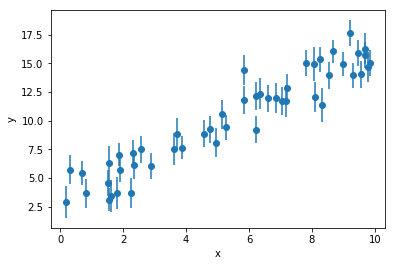

In [5]:
plt.errorbar(data, y,yerr=yerr, fmt='o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
def lnlike(theta, x, y, yerr):
    m, b = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2)
    return -0.5*(np.sum((y-model)**2 - np.log(inv_sigma2)))

In [7]:
plist = [0.0,5.0,0.0,5.0]

In [8]:
def lnprior(theta, plist):
    m, b = theta
    if plist[0] < m < plist[1] and plist[2] < b < plist[3]:
        return 0.0
    return -np.inf

In [9]:
x = data
sigma_m = 0.1#tamaño del paso
sigma_b = 0.3#
paso_i = [1.3,3.1]
NS = 1000#Numero de pasos

In [10]:
nll = lambda *args: -lnlike(*args)
#print nll
result = op.minimize(nll, [m_i, b_i], args=(x, y, yerr))
#print result
m_ml, b_ml = result["x"]
#print m_ml, b_ml

In [11]:
def posti(theta, x, y, yerr):
    lp = lnlike(theta, x, y, yerr)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

In [12]:
ndim = 2#numero de parametros libres
nwalkers = 10#numero de caminantes

In [13]:
post = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [14]:
#print post

In [15]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, posti, args=(x, y, yerr))

In [16]:
sampler.run_mcmc(post,1000)#1000pasos

(array([[1.29987194, 2.98893359],
        [1.33127634, 3.0406503 ],
        [1.32712888, 2.9495644 ],
        [1.31887905, 2.89698002],
        [1.34225116, 2.73898466],
        [1.29819749, 3.07077598],
        [1.34676988, 2.78442696],
        [1.29867533, 3.04451298],
        [1.39677771, 2.55443307],
        [1.3589333 , 2.50888338]]),
 array([-312.50375797, -313.61363711, -312.28467006, -312.18644713,
        -312.47087261, -312.45248135, -312.32832872, -312.4133768 ,
        -314.59814313, -314.74465969]),
 ('MT19937', array([3347273000, 2512947938, 2267483465, 3093032584,  124838313,
         2939031019, 3382959657, 1488567756, 2483677084, 3875296467,
         3102614719, 4158455369, 3463401242, 3599908808, 3699075244,
         1278597242, 4145535482, 1762463763, 2436926265, 3444588821,
         1503479949, 1592977760,  689731516, 1533459186, 2034001457,
         3257708404, 1998065553, 4207889754, 3753633010, 3189090927,
         3627037668, 2959222838, 2957937801, 2171317578, 

In [17]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))#50:Burning

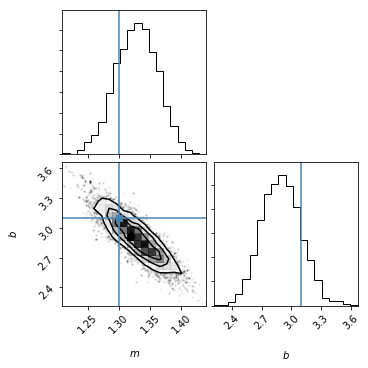

In [18]:
fig = corner.corner(samples, labels=["$m$", "$b$"],truths=[m_i, b_i])